# 📄 Generating plot demonstrating the choice of the target dependent variables, $\pmb{\phi}$ (**Figure 3**)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
scaling = '-1to1'
n_components = 2
sample_percentage = 100

In [3]:
data_tag = 'lightweight-flamelet-CO-H2-10-1'
%run -i load-SLFM-data.py

Removing N2.

The data set has 9800 observations.

Using: T, H2, O2, OH, H2O, CO, CO2 as target variables.


In [4]:
pca = reduction.PCA(state_space, scaling=scaling, n_components=n_components)
PCs = pca.transform(state_space)
PC_sources = pca.transform(state_space_sources, nocenter=True)
(PCs, _, _) = preprocess.center_scale(PCs, '-1to1')

***

## ✏️ Plot

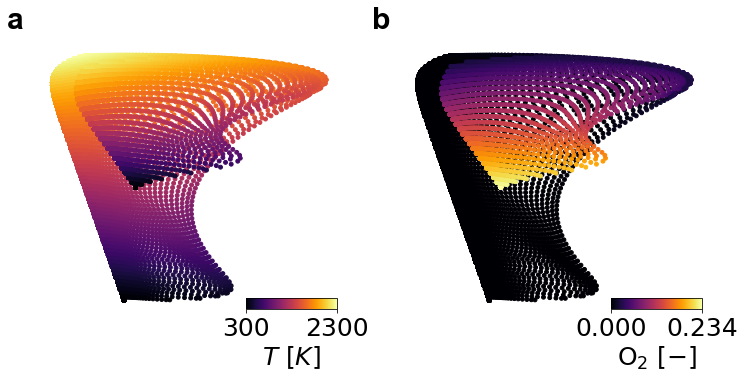

In [5]:
figure = plt.figure(figsize=(12, 5))
spec = figure.add_gridspec(ncols=2, nrows=1, width_ratios=[1, 1], height_ratios=[1])

point_size = 15

figure_a = figure.add_subplot(spec[0,0:1])
scat_a = figure_a.scatter(PCs[state_space[:,2]<0.025,0], PCs[state_space[:,2]<0.025,1], c=state_space[state_space[:,2]<0.025,0], s=point_size, cmap='inferno', vmin=np.min(state_space[:,0]), vmax=np.max(state_space[:,0]))
scat_a = figure_a.scatter(PCs[state_space[:,2]>=0.025,0], PCs[state_space[:,2]>=0.025,1], c=state_space[state_space[:,2]>=0.025,0], s=point_size, cmap='inferno', vmin=np.min(state_space[:,0]), vmax=np.max(state_space[:,0]))
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.text(-0.1,1.05,'a', **hfont, fontsize=30, transform=figure_a.transAxes)
cbaxes = inset_axes(figure_a, width="30%", height="4%", loc='lower right')
cbar = plt.colorbar(scat_a, ticks=[300,2300], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$T$ [$K$]', fontsize=25, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(25)
        
figure_b = figure.add_subplot(spec[0,1:2])
scat_b = figure_b.scatter(PCs[state_space[:,2]<0.025,0], PCs[state_space[:,2]<0.025,1], c=state_space[state_space[:,2]<0.025,2], s=point_size, cmap='inferno', vmin=np.min(state_space[:,2]), vmax=np.max(state_space[:,2]), zorder=1)
scat_b = figure_b.scatter(PCs[state_space[:,2]>=0.025,0], PCs[state_space[:,2]>=0.025,1], c=state_space[state_space[:,2]>=0.025,2], s=point_size, cmap='inferno', vmin=np.min(state_space[:,2]), vmax=np.max(state_space[:,2]), zorder=3)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.text(-0.1,1.05,'b', **hfont, fontsize=30, transform=figure_b.transAxes)
cbaxes = inset_axes(figure_b, width="30%", height="4%", loc='lower right')
cbar = plt.colorbar(scat_b, ticks=[0,np.max(state_space[:,2])], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('O$_2$ [$-$]', fontsize=25, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(25)

plt.savefig('../figures/Figure-3.png', dpi=200, bbox_inches='tight')

***

## Compute costs for the two manifolds

In [6]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(PCs, 
                                                     state_space[:,0:1], 
                                                     depvar_names=['T'],
                                                     scale_unit_box=False,
                                                     bandwidth_values=bandwidth_values)

cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                             penalty_function=penalty_function, 
                                                             norm=None, 
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.8 minutes.
----------------------------------------


In [7]:
print(cost)

[1.3160599759811262]


In [8]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(PCs, 
                                                     state_space[:,2:3], 
                                                     depvar_names=['O2'],
                                                     scale_unit_box=False,
                                                     bandwidth_values=bandwidth_values)

cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                             penalty_function=penalty_function, 
                                                             norm=None, 
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 1.0 minutes.
----------------------------------------


In [9]:
print(cost)

[1.8968972985524963]


***